In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import mylibrary.datasets as datasets
%matplotlib inline

In [17]:
mnist = datasets.MNIST()
train_data, train_label_, test_data, test_label_ = mnist.load()

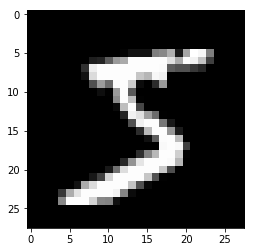

In [18]:
plt.imshow(train_data[0].reshape(28,28), cmap='gray')

In [19]:
train_data = train_data / 255.
test_data = test_data / 255.

input_size = 784
hidden_1 = 10
output_size = 10

learning_rate = 0.001
batch_size = 64#300

train_label = tnn.Logits.index_to_logit(train_label_)
train_size = len(train_label)

In [29]:
optimizer = tnn.Adam(learning_rate)
layer1 = tnn.NonLinearLayer(input_size, hidden_1, activation=tnn.Relu(), optimizer=optimizer)
layer2 = tnn.NonLinearLayer(hidden_1, output_size, optimizer=optimizer)
layer3 = tnn.Softmax()

In [30]:
accuracy_list = []
for epoch in range(5):
    for index in range(train_size // batch_size):
        train_x = train_data[index * batch_size:(index + 1) * batch_size]
        train_y = train_label[index * batch_size:(index + 1) * batch_size]

        a1 = layer1.forward(train_x)
        a2 = layer2.forward(a1)
        yout = layer3.forward(a2)

        dy = tnn.CrossEntropyLoss.del_loss(yout, train_y)
        loss = tnn.CrossEntropyLoss.loss(yout, train_y)

        da2 = layer3.backward(dy)
        da1 = layer2.backward(da2)
        dx = layer1.backward(da1)

        layer1.update()
        layer2.update()
        layer3.update()
        
        if index % 100 == 0:
            
            print('\nTRAIN',index, '-> ', loss)
            a1 = layer1.forward(train_data)
            a2 = layer2.forward(a1)
            yout = layer3.forward(a2)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(train_label_)).sum()

            accuracy = correct / len(train_label_) * 100.
            print('EPOCH = ',epoch,'accuracy = ', accuracy)
            print(correct, '/', len(train_label_))
            
            a1 = layer1.forward(test_data)
            a2 = layer2.forward(a1)
            yout = layer3.forward(a2)
            outputs = tnn.Logits.logit_to_index(yout)
            correct = (outputs == np.array(test_label_)).sum()

            accuracy = correct / len(test_label_) * 100.
            print('   TEST  ','accuracy = ', accuracy)
            print(correct, '/', len(test_label_))            


TRAIN 0 ->  2.629965704383898
EPOCH =  0 accuracy =  6.995
4197 / 60000
   TEST   accuracy =  7.03
703 / 10000

TRAIN 100 ->  1.4336881486249484
EPOCH =  0 accuracy =  52.583333333333336
31550 / 60000
   TEST   accuracy =  53.68000000000001
5368 / 10000

TRAIN 200 ->  0.7311171282338842
EPOCH =  0 accuracy =  79.975
47985 / 60000
   TEST   accuracy =  80.96
8096 / 10000

TRAIN 300 ->  0.5625664828996675
EPOCH =  0 accuracy =  84.5
50700 / 60000
   TEST   accuracy =  85.21
8521 / 10000

TRAIN 400 ->  0.43655538184930076
EPOCH =  0 accuracy =  86.39666666666666
51838 / 60000
   TEST   accuracy =  86.87
8687 / 10000

TRAIN 500 ->  0.4274165722961154
EPOCH =  0 accuracy =  87.31333333333333
52388 / 60000
   TEST   accuracy =  87.78
8778 / 10000

TRAIN 600 ->  0.307430441675361
EPOCH =  0 accuracy =  88.28666666666666
52972 / 60000
   TEST   accuracy =  88.44
8844 / 10000

TRAIN 700 ->  0.45460393192862353
EPOCH =  0 accuracy =  88.775
53265 / 60000
   TEST   accuracy =  88.85
8885 / 10000

In [31]:
a1 = layer1.forward(train_data)
a2 = layer2.forward(a1)
yout = layer3.forward(a2)

dy = tnn.CrossEntropyLoss.del_loss(yout, train_label)
loss = tnn.CrossEntropyLoss.loss(yout, train_label)

da2 = layer3.backward(dy)
da1 = layer2.backward(da2)
dx = layer1.backward(da1)

In [32]:
layer2.input.shape, layer2.output.shape

((60000, 10), (60000, 10))

In [56]:
i=0

6


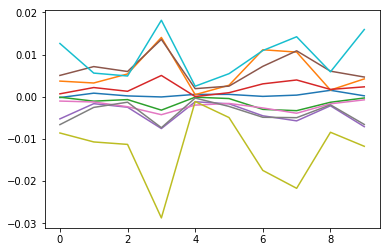

In [63]:
do2 = layer2.del_weights
plt.plot(do2)
print(i)
i+=1

In [68]:
layer2.del_weights.mean(axis=1)

array([ 4.74669564e-05,  2.03906060e-04, -1.52414316e-05, -7.61189433e-06,
        9.57453402e-05,  1.48078199e-04,  1.11573722e-05,  6.25528951e-05,
        1.53335287e-04,  1.12949821e-04])

9


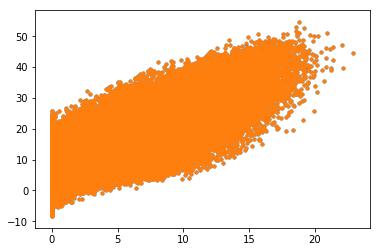

In [53]:
a1 = layer2.input
a2 = layer2.output
a2_ = layer2.output - layer2.del_output
plt.scatter(a1[:, i], a2_[:, i], marker='.')
plt.scatter(a1[:, i], a2[:, i], marker='.')
print(i)
# i+=1

In [39]:
layer2.del_output.max(), layer2.del_output.mean(), layer2.del_output.min(), 

(0.14814814767250553, 4.171502566223324e-05, -0.1481481386225144)

8


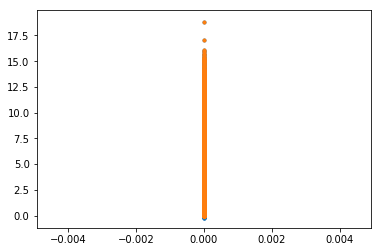

In [52]:
a1 = layer1.input
a2 = layer1.output
a2_ = layer1.output - layer1.del_output
plt.scatter(a1[:, i], a2_[:, i], marker='.')
plt.scatter(a1[:, i], a2[:, i], marker='.')
print(i)
i+=1

In [45]:
layer1.input.max()

1.0

In [41]:
layer1.del_output.max(), layer1.del_output.mean(), layer1.del_output.min(), 

(0.3176605364316483, -6.623072000699156e-05, -0.3196508246601491)

## Using large number of spline units

In [13]:
# optimizer = tnn.Adam(learning_rate)
# layer1 = tnn.LinearLayer(input_size, hidden_1, optimizer=optimizer)
# layer2 = spline.SplineVectorLayer(hidden_1, max_points=7)  # 2 -> Linear; 3 -> DoubleRelu
# layer3 = tnn.NonLinearLayer(hidden_1, output_size, activation=tnn.Softmax(), optimizer=optimizer)

# accuracy_list = []
# for epoch in range(20):
#     for index in range(train_size // batch_size):
#         train_x = train_data[index * batch_size:(index + 1) * batch_size]
#         train_y = train_label[index * batch_size:(index + 1) * batch_size]

#         a1 = layer1.forward(train_x)
#         a2 = layer2.forward(a1)
#         yout = layer3.forward(a2)

#         dy = tnn.CrossEntropyLoss.del_loss(yout, train_y)
#         loss = tnn.CrossEntropyLoss.loss(yout, train_y)

#         da2 = layer3.backward(dy)
#         da1 = layer2.backward(da2)
#         dx = layer1.backward(da1)

#         layer1.update()
#         layer2.update(learning_rate=0.1)
#         layer3.update()
        
#         if index % 100 == 0:
#             layer2._maintain_good_spline_()
            
#             print('\nTRAIN',index, '-> ', loss)
#             a1 = layer1.forward(train_data)
#             a2 = layer2.forward(a1)
#             yout = layer3.forward(a2)
#             outputs = tnn.Logits.logit_to_index(yout)
#             correct = (outputs == np.array(train_label_)).sum()

#             accuracy = correct / len(train_label_) * 100.
#             print('EPOCH = ',epoch,'accuracy = ', accuracy)
#             print(correct, '/', len(train_label_))
            
#             a1 = layer1.forward(test_data)
#             a2 = layer2.forward(a1)
#             yout = layer3.forward(a2)
#             outputs = tnn.Logits.logit_to_index(yout)
#             correct = (outputs == np.array(test_label_)).sum()

#             accuracy = correct / len(test_label_) * 100.
#             print('   TEST  ','accuracy = ', accuracy)
#             print(correct, '/', len(test_label_))            

In [14]:
# a1 = layer1.forward(train_data)
# a2 = layer2.forward(a1)
# yout = layer3.forward(a2)

# dy = tnn.CrossEntropyLoss.del_loss(yout, train_label)
# loss = tnn.CrossEntropyLoss.loss(yout, train_label)

# da2 = layer3.backward(dy)
# da1 = layer2.backward(da2)
# dx = layer1.backward(da1)

In [15]:
# i=0
# layer2.input.shape, layer2.output.shape

In [16]:
# a1 = layer2.input
# a2 = layer2.output
# a2_ = layer2.output - layer2.del_output
# plt.scatter(a1[:, i], a2_[:, i], marker='.')
# plt.scatter(a1[:, i], a2[:, i], marker='.')
# print(i)
# i+=1

In [17]:
# layer2.del_output.max()